In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Shubh Thaker`


In [ ]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets"])

In [2]:
using Images, Colors, MLDatasets

In [3]:
dataset = MNIST()

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [4]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [5]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [6]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

In [ ]:
Gray.(dataset.features[:,:,5]'/ 255)

## BME 574 Midterm Exam (take-home)

The dataset above is the famous MNIST dataset of handwritten digits (28x28 grayscale images).
The challenge for this midterm is to find the most informative pixels for each digit from this dataset
using techniques that you have learning previously.  Here is how to start:
1. Create a set of output (label) vectors $\{y_j\}$ of length 10 that represent the labels (0-9)
here are a few examples:
$$
\begin{align}
^{"}1^{"}=\begin{bmatrix} 1\\0\\0\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}3^{"}=\begin{bmatrix} 0\\0\\1\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}0^{"}=\begin{bmatrix} 0\\0\\0\\ \vdots \\1 \end{bmatrix}
\end{align}
$$
2. Now let $B$ be the set of output (label) vectors

$$
\begin{align}
B = \begin{bmatrix} y_{1} & y_{2} & y_{3} & \ldots & y_{n}\end{bmatrix}
\end{align}
$$

3. Let the matrix $A$ be the corresponding reshaped (vectorized) MNIST images (one in each row)

$$
\begin{align}
A = \begin{bmatrix} x_{1} & x_{2} & x_{3} & \ldots & x_{n}\end{bmatrix}
\end{align}
$$

4. $AX = B$ maps from the image space to the label space

Your task is to use solvers for $AX=B$ that promote sparsity to rank the pixels in the MNIST dataset that are most informative for correctly labeling the digits. You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from X. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to ﬁnd the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.
Hint: for testing, it may be a good idea to start with a smaller dataset (e.g. 1000 images)

In [7]:
# Prepare Data Set
using Random

In [8]:
using StatsBase

In [9]:
#Prepare Dataset
trainImages = Float64.(dataset.features)  #Normalizing images from 0 to 1 pixel values
trainLabels = dataset.targets
testImages = Float64.(testset.features) 
testLabels = testset.targets

nImages = 1000
Random.seed!(42)
index = sample(1:length(trainLabels), nImages, replace = false)

#bandImages = trainImages[:, :, index]
#bandLabels = trainLabels[index]

1000-element Vector{Int64}:
 37761
 27021
 28645
 42188
 40401
  9954
 36809
 40101
 27422
 17962
 39669
 38366
 20559
     ⋮
 34107
 41701
 43904
 31123
 44860
 56915
 32857
 32429
  7851
 21168
 21048
 40528

In [10]:
trainImages

28×28×60000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

In [11]:
nImages = size(trainImages, 3)
placeholder = Array{Float64}(undef, 28, 28, nImages)
for i in 1:nImages
    placeholder[:, :, i] = trainImages[:, :, i]' 
end
trainImages = placeholder

28×28×60000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮      

In [12]:
using LinearAlgebra

In [13]:
#SVD on the A matrix to reduce the dimensionality of dataset for Lasso
nImages = size(trainImages, 3)
A = reshape(trainImages, 28 *28, nImages)


U, Σ, V = svd(A)
nComponents = 100

# A truncated form of U and Σ to use top singular vectors for computational ease
uReduced = U[:, 1:nComponents] 
ΣReduced = Diagonal(Σ[1:nComponents])
vReduced = V[:, 1:nComponents] 

A_svd = uReduced' * A


100×60000 Matrix{Float64}:
 -6.49824    -6.87648    -3.1405     …  -4.90766    -4.38714    -4.59276
  0.186086   -3.66891    -1.3236         0.557348   -1.28526     0.52433
 -1.20904    -1.20822     1.47838        0.633943   -0.0581564  -0.0839716
  0.365287   -2.73008     0.126954       1.20548    -2.54587    -2.21356
 -2.00852    -3.30527     1.17415       -2.90643     0.110948   -0.934439
  0.953211    0.444577   -0.0886541  …   1.83171     1.86579    -0.904326
 -0.116981   -0.760851    1.90865        1.3203     -0.775916    1.42495
  1.8355     -0.557348   -0.758712      -0.811004   -0.18954    -1.10747
 -0.113658   -0.22451     1.72611       -0.526473    0.639939   -0.235879
  0.825776    0.577405   -0.397241       1.12379    -0.3006     -0.514048
 -0.519868    1.12461    -2.00914    …  -0.261222    0.056853    0.0636907
  1.11518     0.0198628   0.617593       1.34287     0.488638    2.01059
 -0.0998279  -1.15521     0.851783       0.718607   -1.66489     0.720777
  ⋮            

In [14]:
#Prepare label data for lasso target
nDigits = 10
nTrainImages = size(trainImages, 3)
B = zeros(nTrainImages, nDigits)
for i in 1:nTrainImages
    B[i, trainLabels[i]+1] = 1 
end
B

60000×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1

In [15]:
using Convex, SCS

function lasso(A, y, λ1)
    (T, K) = (size(A, 1), size(A, 2))
    Q = A'A / T
    c = A'y / T

    x = Variable(K)                 # Define optimization variable
    L1 = quadform(x, Q; assume_psd=true)  # b'Q*b
    L2 = dot(c, x)                  # c'b
    L3 = norm(x, 1)                 # sum(|b|)

    problem = minimize(L1 - 2 * L2 + λ1 * L3)
    solve!(problem, SCS.Optimizer; silent = true)
    return vec(Convex.evaluate(x))
end



lasso (generic function with 1 method)

In [16]:
println("Dimensions of A_svd: ", size(A_svd))
println("Dimensions of B: ", size(B))

Random.seed!(42)
nImages = 10000
idx = sample(1:size(A_svd, 2), nImages, replace = false)
A_svdReduced = A_svd[:, idx]
B_reduced = B[idx, :]

println("Dimensions of A_svd: ", size(A_svdReduced))
println("Dimensions of B: ", size(B_reduced))

Dimensions of A_svd: (100, 60000)
Dimensions of B: (60000, 10)
Dimensions of A_svd: (100, 10000)
Dimensions of B: (10000, 10)


using Lasso

In [ ]:
using GLMNet

In [17]:
λ1 = 0.1

nDigits = 10  
nComponents = size(A_svd, 1)  
coefficients = zeros(nComponents, nDigits)


for digit in 1:nDigits
   coefficients[:, digit] = lasso(A_svdReduced', B_reduced[:, digit], λ1)
end
coefficients
#for digit in 1:nDigits
 #   fit = glmnet(A_svd, B[:, digit], lambda=[λ1], alpha=1.0)  
  #  coefficients[:, digit] = GLMNet.coef(fit)[:, 1] 
#end


100×10 Matrix{Float64}:
 -0.0167709   -0.00982553   -0.0155861    …  -0.0171073   -0.0145232
 -0.0715477    0.0563692     2.04567e-5       0.0127522    0.00989693
 -0.00614825  -0.0346203    -0.0197551       -0.00418774   0.0491477
 -0.0129729   -8.60509e-6   -0.0104888        1.20744e-5   0.00395156
 -0.0332318    1.41011e-6    0.0543314       -5.72388e-6  -4.06295e-5
 -5.97871e-5  -2.83457e-6   -0.0239081    …  -3.98382e-6   1.77637e-5
 -0.0118204   -0.0411531     1.02131e-6       0.0267205    3.14817e-5
 -3.32777e-5  -0.0242544     0.0377866       -2.97371e-7  -6.7761e-5
 -1.31984e-5  -2.25524e-7    3.95501e-7      -0.0326406   -8.72765e-6
  1.43053e-5   2.02648e-7    0.0025063       -2.11411e-8   3.70521e-6
  4.68013e-5  -2.19502e-7    1.51463e-7   …   7.30232e-8   1.04915e-5
  1.25619e-7  -1.80482e-8    8.73894e-8      -4.1864e-8    1.22282e-6
 -9.32574e-6   1.34835e-7   -9.16959e-7       0.0334322   -3.0687e-5
  ⋮                                       ⋱               
  7.84413e-

In [18]:
#Reshape Test Images
nImages = size(testImages, 3)
placeholder = Array{Float64}(undef, 28, 28, nImages)
for i in 1:nImages
    placeholder[:, :, i] = testImages[:, :, i]'
end
testImages = placeholder


28×28×10000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.329412     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.870588     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.262745     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 ⋮      

In [19]:
# Testing
function predictDigits(A, coefficients)
    vals = coefficients' * A
    predLabels = map(i -> i[1], argmax(vals, dims = 1)) .- 1
    return vec(predLabels)
end

function calculateAccuracy(predictions, labels)
    acc = mean(predictions .== labels)
    return acc
end

function actuallyCalculatingAccuracy(A_data, B_data, coefficients)
    allPredictions = predictDigits(A_data, coefficients)
    allLabels = [argmax(B_data[digit, :]) - 1 for digit in 1:size(B_data, 1)]
    accuracy = calculateAccuracy(allPredictions, allLabels)
    return accuracy
end

actuallyCalculatingAccuracy (generic function with 1 method)

In [20]:
predictDigits(A_svdReduced, coefficients)

10000-element Vector{Int64}:
 2
 1
 7
 6
 4
 4
 1
 9
 2
 0
 0
 1
 7
 ⋮
 1
 7
 1
 4
 1
 3
 6
 3
 2
 6
 0
 3

In [21]:
#Prepare test dataset
nTestImages = size(testImages, 3)
testImagesReshaped = reshape(testImages, 28*28, nTestImages)
ATest = uReduced' * testImagesReshaped

nDigits = 10
nTestImages = size(testImages, 3)
BTest = zeros(nTestImages, nDigits)
for i in 1:nTestImages
    BTest[i, testLabels[i]+1] = 1 
end
BTest

10000×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0

In [22]:
testAccuracy = actuallyCalculatingAccuracy(ATest, BTest, coefficients)


0.6876

In [23]:
# Cross validation to optimize 
λValues = 0.0005:0.0002:0.3
nDigits = 10
λAccuracies = zeros(length(λValues))

for (i, λ1) in enumerate(λValues)
    coefficients = zeros(nComponents, nDigits)
    for digit in 1:nDigits
        coefficients[:, digit] = lasso(A_svdReduced', B_reduced[:, digit], λ1)
    end
    testAccuracy = actuallyCalculatingAccuracy(ATest, BTest, coefficients)
    λAccuracies[i] = testAccuracy
    println("Lambda: $λ1, Test Accuracy: $testAccuracy")
end

Lambda: 0.0005, Test Accuracy: 0.8548
Lambda: 0.0007, Test Accuracy: 0.8551
Lambda: 0.0009, Test Accuracy: 0.8551
Lambda: 0.0011, Test Accuracy: 0.8561
Lambda: 0.0013, Test Accuracy: 0.8563
Lambda: 0.0015, Test Accuracy: 0.8552
Lambda: 0.0017, Test Accuracy: 0.8551
Lambda: 0.0019, Test Accuracy: 0.8547
Lambda: 0.0021, Test Accuracy: 0.8541
Lambda: 0.0023, Test Accuracy: 0.8539
Lambda: 0.0025, Test Accuracy: 0.8535
Lambda: 0.0027, Test Accuracy: 0.8531
Lambda: 0.0029, Test Accuracy: 0.8526
Lambda: 0.0031, Test Accuracy: 0.8534
Lambda: 0.0033, Test Accuracy: 0.853
Lambda: 0.0035, Test Accuracy: 0.8525
Lambda: 0.0037, Test Accuracy: 0.8514
Lambda: 0.0039, Test Accuracy: 0.8512
Lambda: 0.0041, Test Accuracy: 0.8514
Lambda: 0.0043, Test Accuracy: 0.8503
Lambda: 0.0045, Test Accuracy: 0.8489
Lambda: 0.0047, Test Accuracy: 0.8479
Lambda: 0.0049, Test Accuracy: 0.8473
Lambda: 0.0051, Test Accuracy: 0.8466
Lambda: 0.0053, Test Accuracy: 0.8462
Lambda: 0.0055, Test Accuracy: 0.8461
Lambda: 0.005

Lambda of 0.0013 gives highest accuracy

In [24]:
λ1 = 0.0013
coefficients = zeros(nComponents, nDigits)
for digit in 1:nDigits
    coefficients[:, digit] = lasso(A_svdReduced', B_reduced[:, digit], λ1)
end

allPredictions = predictDigits(ATest, coefficients)

10000-element Vector{Int64}:
 7
 2
 1
 0
 4
 1
 4
 9
 4
 9
 0
 4
 9
 ⋮
 5
 6
 7
 8
 4
 0
 1
 2
 3
 4
 8
 6

In [25]:
using Plots, Images

In [53]:
function visualizer(A_test, allPredictions, testImages, coefficients, trueLabels; nSamples = 10)
    predLabels = allPredictions
    sampleIdx = rand(1:length(trueLabels), nSamples)
    for i in sampleIdx
        img = reshape(testImages[:,:,i] , (28, 28))
        overlayCoeff = reshape(uReduced * coefficients[:, trueLabels[i] + 1], (28, 28))
        normalizeCoeff = (overlayCoeff .- minimum(overlayCoeff)) / (maximum(overlayCoeff) - minimum(overlayCoeff) + 1e-10)
        overlaidImage = Gray.(img) .* (1 .- normalizeCoeff) .+ RGB(1,0,0) .* normalizeCoeff
        display(overlaidImage)
        println("True: ", trueLabels[i], "| Prediction: ", predLabels[i])
    end
end
    

visualizer (generic function with 1 method)

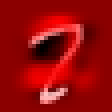

True: 2| Prediction: 7


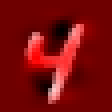

True: 4| Prediction: 4


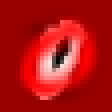

True: 0| Prediction: 8


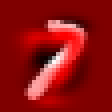

True: 7| Prediction: 2


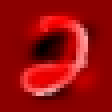

True: 2| Prediction: 2


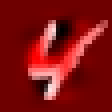

True: 4| Prediction: 8


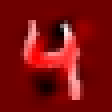

True: 4| Prediction: 9


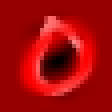

True: 0| Prediction: 0


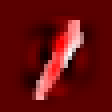

True: 1| Prediction: 1


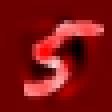

True: 5| Prediction: 5


In [54]:
# can see most important pixels
visualizer(ATest, allPredictions, testImages, coefficients, testLabels)

In [74]:
function heatmapper(ATest, allPredictions, testImages, coefficients, trueLabels, uReduced; nSamples = 10, threshold = 0.4)
    predLabels = allPredictions
    sampleIdx = rand(1:length(trueLabels), nSamples)
    for i in sampleIdx
        overlayCoeff = reshape(uReduced * coefficients[:, trueLabels[i] + 1], (28, 28))
        normalizeCoeff = (overlayCoeff .- minimum(overlayCoeff)) / (maximum(overlayCoeff) - minimum(overlayCoeff) + 1e-10)
        mask = normalizeCoeff .>= threshold
        filteredCoeff = normalizeCoeff .* mask
        display(heatmap(filteredCoeff, color = :inferno, title = "Display Top Coeff(Pixels)", axis = nothing))
        println("True: ", trueLabels[i], "| Prediction: ", predLabels[i])
    end
end
        
        

heatmapper (generic function with 1 method)

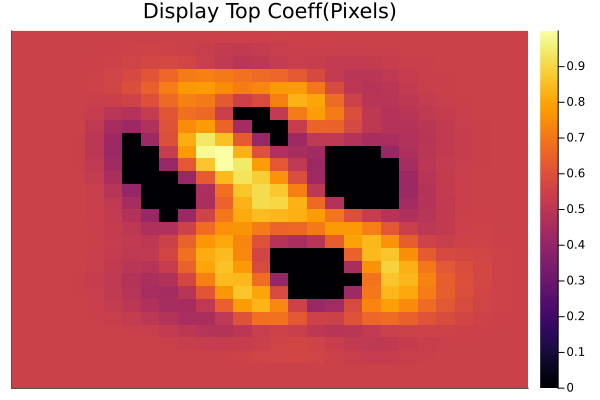

True: 8| Prediction: 1


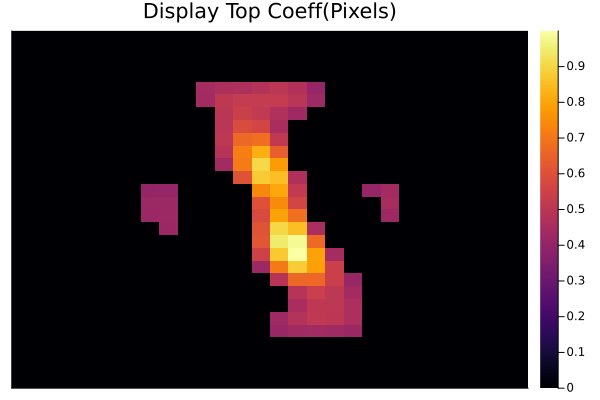

True: 1| Prediction: 1


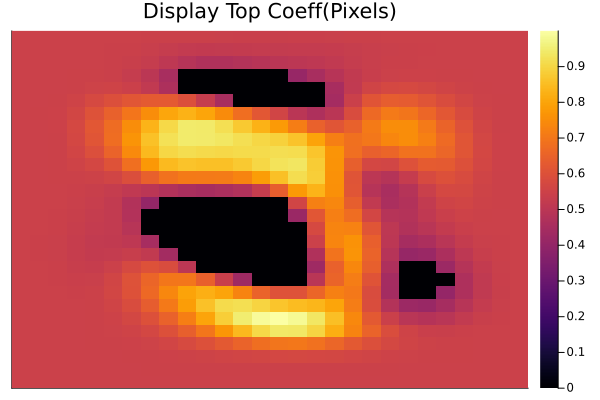

True: 2| Prediction: 2


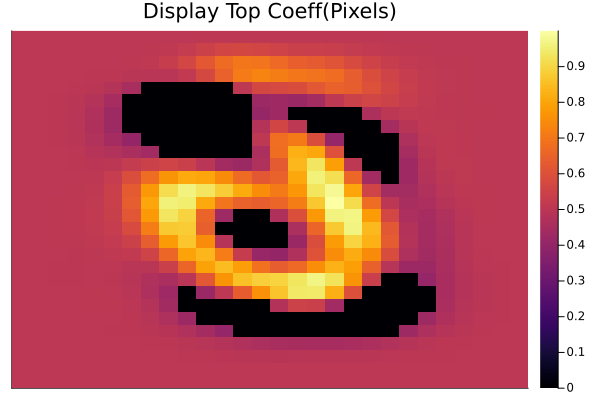

True: 9| Prediction: 9


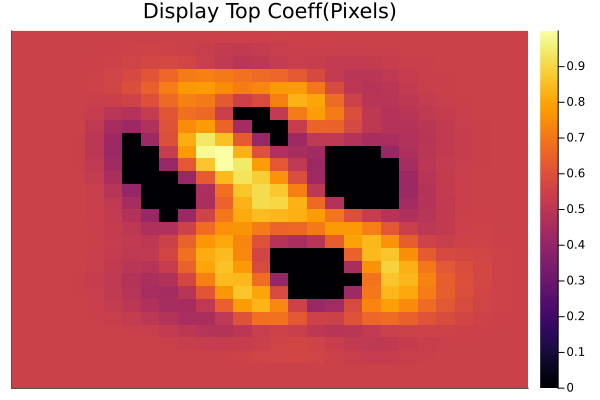

True: 8| Prediction: 6


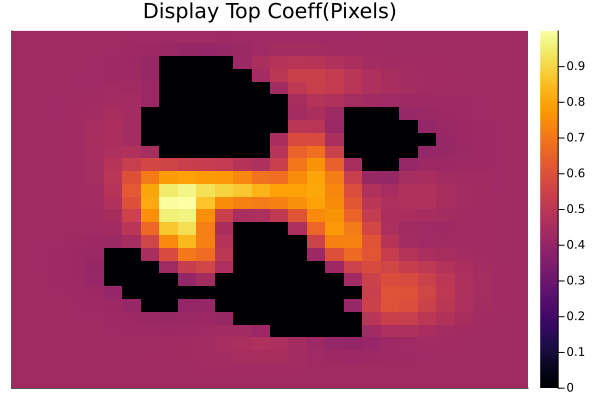

True: 4| Prediction: 4


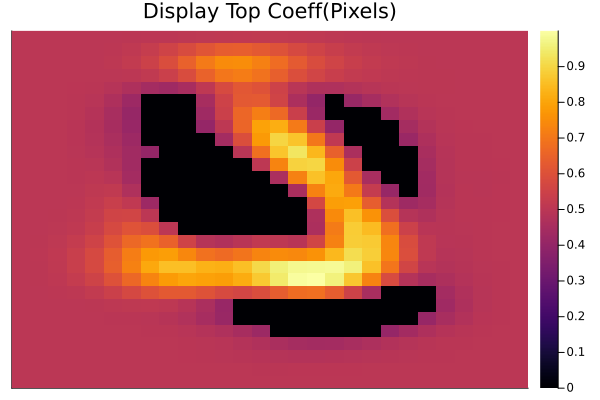

True: 7| Prediction: 7


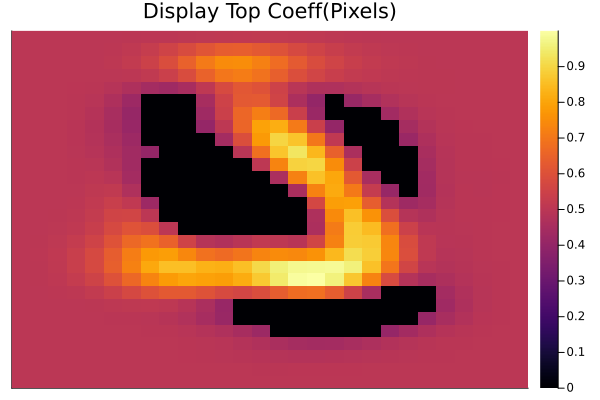

True: 7| Prediction: 7


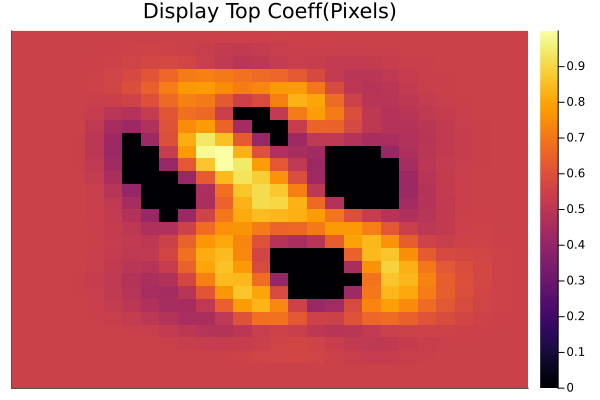

True: 8| Prediction: 8


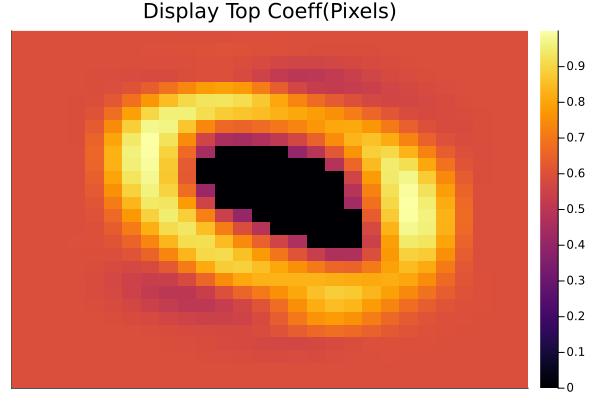

True: 0| Prediction: 0


In [75]:
heatmapper(ATest, allPredictions, testImages, coefficients, testLabels, uReduced)

In [31]:
function importantPixelsIdx(coefficients::Array{Float64,2}, nTop::Int)
    importantCoeffs = sum(abs.(coefficients), dims = 2)
    importantCoeffsVec = vec(importantCoeffs)
    sortIdx = sortperm(importantCoeffsVec, rev = true)
    return sortIdx[1:nTop]
end

nTopPixels = 50
importantPixels = importantPixelsIdx(coefficients, nTopPixels)


50-element Vector{Int64}:
  8
  3
 13
  5
  7
 20
 15
 19
 16
  9
  6
 17
 23
  ⋮
 45
 89
 53
 51
 75
 28
 67
 18
 55
 41
 58
 33

In [37]:
function filterImportantData(data::Array{Float64, 2}, importantPixels::Vector{Int})
    return data[importantPixels, :]
end

filteredATest = filterImportantData(ATest, importantPixels)
topCoeffs = coefficients[importantPixels, :]
filteredPredictions = predictDigits(filteredATest, topCoeffs)
filteredAccuracy = calculateAccuracy(filteredPredictions, testLabels)



0.8376

Difference in Accuracy
without using only importantpixels: 0.8563
with using only importantpixels: 0.8376



In [43]:
# Just testing this out -> trying to see how accuracy changes (doesnt seem to change at all for lambda changes and it gets worse)
λValues = 0.0005:0.0002:0.05
nDigits = 10
λAccuracies = zeros(length(λValues))

for (i, λ1) in enumerate(λValues)
    coefficients = zeros(nComponents, nDigits)
    for digit in 1:nDigits
        coefficients[:, digit] = lasso(A_svdReduced', B_reduced[:, digit], λ1)
        topCoeffs[:, digit] = coefficients[importantPixels]
    end
    testAccuracy = actuallyCalculatingAccuracy(filteredATest, BTest, topCoeffs)
    λAccuracies[i] = testAccuracy
    println("Lambda: $λ1, Test Accuracy: $testAccuracy")
end

Lambda: 0.0005, Test Accuracy: 0.098
Lambda: 0.0007, Test Accuracy: 0.098
Lambda: 0.0009, Test Accuracy: 0.098
Lambda: 0.0011, Test Accuracy: 0.098
Lambda: 0.0013, Test Accuracy: 0.098
Lambda: 0.0015, Test Accuracy: 0.098
Lambda: 0.0017, Test Accuracy: 0.098
Lambda: 0.0019, Test Accuracy: 0.098
Lambda: 0.0021, Test Accuracy: 0.098
Lambda: 0.0023, Test Accuracy: 0.098
Lambda: 0.0025, Test Accuracy: 0.098
Lambda: 0.0027, Test Accuracy: 0.098
Lambda: 0.0029, Test Accuracy: 0.098
Lambda: 0.0031, Test Accuracy: 0.098
Lambda: 0.0033, Test Accuracy: 0.098
Lambda: 0.0035, Test Accuracy: 0.098
Lambda: 0.0037, Test Accuracy: 0.098
Lambda: 0.0039, Test Accuracy: 0.098
Lambda: 0.0041, Test Accuracy: 0.098
Lambda: 0.0043, Test Accuracy: 0.098
Lambda: 0.0045, Test Accuracy: 0.098
Lambda: 0.0047, Test Accuracy: 0.098
Lambda: 0.0049, Test Accuracy: 0.098
Lambda: 0.0051, Test Accuracy: 0.098
Lambda: 0.0053, Test Accuracy: 0.098
Lambda: 0.0055, Test Accuracy: 0.098
Lambda: 0.0057, Test Accuracy: 0.098
L

LoadError: MethodError: no method matching visualize_important_pixels(::Base.ReshapedArray{Float64, 2, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}, ::Vector{Int64})
The function `visualize_important_pixels` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  visualize_important_pixels([91m::Matrix{Float64}[39m, ::Vector{Int64})
[0m[90m   @[39m [35mMain[39m [90m[4mIn[48]:5[24m[39m
